In [14]:
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [15]:
# prompt: import pandas, numpy, matplotlib, tensorflow, sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [16]:
df = pd.read_csv("Final_GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,P_mean,P_sum,twt_count
0,2021-09-30,134.324997,135.589996,133.000000,133.265503,133.265503,35294000,GOOG,-1.0,-1,1
1,2021-10-01,133.554504,137.070999,133.377502,136.462494,136.462494,28388000,GOOG,-1.0,-2,2
2,2021-10-04,135.699493,135.699997,131.166504,133.764999,133.764999,31530000,GOOG,-0.5,-2,4
3,2021-10-05,134.000000,137.362000,134.000000,136.177002,136.177002,24126000,GOOG,-1.0,-2,2
4,2021-10-06,134.625504,137.852005,134.486496,137.354004,137.354004,19764000,GOOG,-1.0,-2,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        238 non-null    object 
 1   Open        238 non-null    float64
 2   High        238 non-null    float64
 3   Low         238 non-null    float64
 4   Close       238 non-null    float64
 5   Adj Close   238 non-null    float64
 6   Volume      238 non-null    int64  
 7   Stock Name  238 non-null    object 
 8   P_mean      238 non-null    float64
 9   P_sum       238 non-null    int64  
 10  twt_count   238 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 20.6+ KB


In [18]:
df['Date']=df.Date.astype('datetime64[ns]')

Text(0.5, 1.0, 'Volume within a Year')

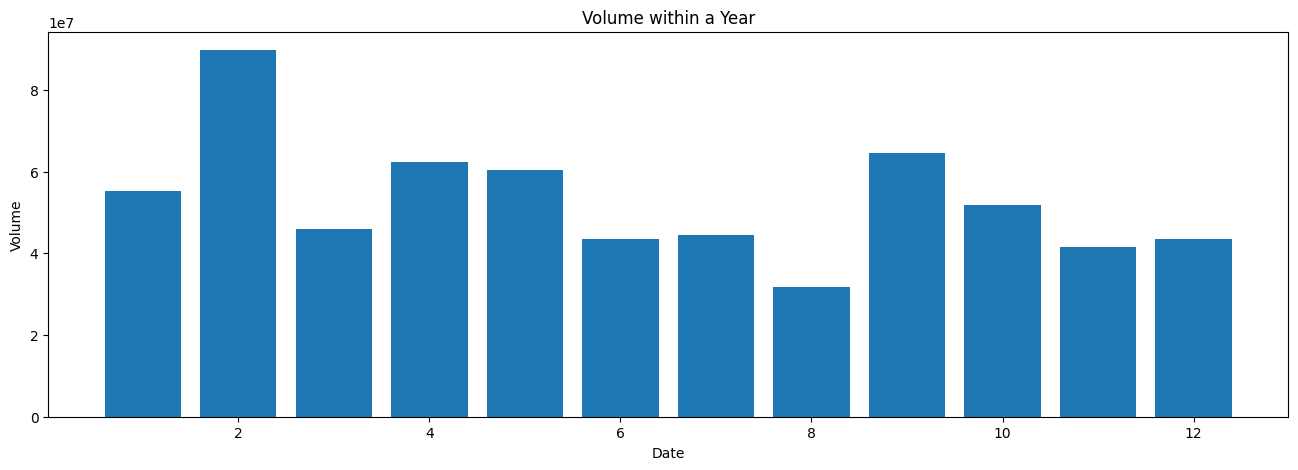

In [19]:
stock_volume = df.groupby(df.Date.dt.month).Volume.max().reset_index()
stock_volume
plt.figure(figsize=[16,5])
plt.bar(stock_volume.Date,stock_volume.Volume)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Volume within a Year")

In [20]:
df = df.set_index('Date')
# df['year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.day
# df['hour'] = df.index.hour
# df['dayofweek'] = df.index.dayofweek
# df['dayofyear'] = df.index.dayofyear
# df['weekofyear'] = df.index.isocalendar().week
# df['quarter'] = df.index.quarter

In [21]:
df

,Open,High,Low,Close,Adj Close,Volume,Stock Name,P_mean,P_sum,twt_count
Date,,,,,,,,,,
2021-09-30,134.324997,135.589996,133.000000,133.265503,133.265503,35294000,GOOG,-1.000000,-1,1
2021-10-01,133.554504,137.070999,133.377502,136.462494,136.462494,28388000,GOOG,-1.000000,-2,2
2021-10-04,135.699493,135.699997,131.166504,133.764999,133.764999,31530000,GOOG,-0.500000,-2,4
2021-10-05,134.000000,137.362000,134.000000,136.177002,136.177002,24126000,GOOG,-1.000000,-2,2
2021-10-06,134.625504,137.852005,134.486496,137.354004,137.354004,19764000,GOOG,-1.000000,-2,2
...,...,...,...,...,...,...,...,...,...,...
2022-09-21,102.239998,103.489998,99.989998,100.010002,100.010002,26596800,GOOG,-0.625000,-5,8
2022-09-22,99.449997,101.680000,99.410004,100.570000,100.570000,21272700,GOOG,-0.500000,-3,6
2022-09-26,98.610001,100.440002,98.379997,98.809998,98.809998,22437900,GOOG,-0.750000,-3,4


In [22]:
# Create a complete date range
full_range = pd.date_range(start=df.index.min(), end=df.index.max())

# Check for missing dates
missing_dates = full_range.difference(df.index)

# Print missing dates
if not missing_dates.empty:
    print("Missing dates:")
    print(missing_dates)
else:
    print("No missing dates.")

Missing dates:
DatetimeIndex(['2021-10-02', '2021-10-03', '2021-10-08', '2021-10-09',
               '2021-10-10', '2021-10-12', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-23',
               ...
               '2022-09-04', '2022-09-05', '2022-09-10', '2022-09-11',
               '2022-09-17', '2022-09-18', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-27'],
              dtype='datetime64[ns]', length=127, freq=None)


In [23]:
# prompt: based on missing dates above i want to fill it with Next Observation Carried Backward (NOCB)

# Fill missing dates with the next observation carried backward (NOCB)
df = df.reindex(full_range, method='ffill')

# Print the updated dataframe
print(df)
df

                  Open        High         Low       Close   Adj Close  \
2021-09-30  134.324997  135.589996  133.000000  133.265503  133.265503   
2021-10-01  133.554504  137.070999  133.377502  136.462494  136.462494   
2021-10-02  133.554504  137.070999  133.377502  136.462494  136.462494   
2021-10-03  133.554504  137.070999  133.377502  136.462494  136.462494   
2021-10-04  135.699493  135.699997  131.166504  133.764999  133.764999   
...                ...         ...         ...         ...         ...   
2022-09-25   99.449997  101.680000   99.410004  100.570000  100.570000   
2022-09-26   98.610001  100.440002   98.379997   98.809998   98.809998   
2022-09-27   98.610001  100.440002   98.379997   98.809998   98.809998   
2022-09-28   98.019997  101.400002   97.800003  100.739998  100.739998   
2022-09-29   99.300003   99.300003   96.519997   98.089996   98.089996   

              Volume Stock Name    P_mean  P_sum  twt_count  
2021-09-30  35294000       GOOG -1.000000     -1 

,Open,High,Low,Close,Adj Close,Volume,Stock Name,P_mean,P_sum,twt_count
2021-09-30,134.324997,135.589996,133.000000,133.265503,133.265503,35294000,GOOG,-1.000000,-1,1
2021-10-01,133.554504,137.070999,133.377502,136.462494,136.462494,28388000,GOOG,-1.000000,-2,2
2021-10-02,133.554504,137.070999,133.377502,136.462494,136.462494,28388000,GOOG,-1.000000,-2,2
2021-10-03,133.554504,137.070999,133.377502,136.462494,136.462494,28388000,GOOG,-1.000000,-2,2
2021-10-04,135.699493,135.699997,131.166504,133.764999,133.764999,31530000,GOOG,-0.500000,-2,4
...,...,...,...,...,...,...,...,...,...,...
2022-09-25,99.449997,101.680000,99.410004,100.570000,100.570000,21272700,GOOG,-0.500000,-3,6
2022-09-26,98.610001,100.440002,98.379997,98.809998,98.809998,22437900,GOOG,-0.750000,-3,4
2022-09-27,98.610001,100.440002,98.379997,98.809998,98.809998,22437900,GOOG,-0.750000,-3,4
2022-09-28,98.019997,101.400002,97.800003,100.739998,100.739998,24617000,GOOG,-0.250000,-1,4


In [24]:
df.sort_index(inplace=True)

In [25]:
#importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv("Final_GOOG.csv")
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [27]:
#Normalizing the data
scaler = MinMaxScaler()
data[['Close']] = scaler.fit_transform(data[['Close']])

In [28]:
values = data[['Close']].values

In [29]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length, 0]  # Close price as target
        xs.append(x)
        ys.append(y)
    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

# Set the sequence length to 180
seq_length = 64
X, y = create_sequences(values, seq_length)

<ipython-input-29-34eaa4f0c145>:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)


In [30]:
# Hitung ukuran untuk setiap bagian
train_size = int(X.shape[0] * 0.7)
val_size = int(X.shape[0] * 0.2)

# Bagi dataset
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

# Verifikasi ukuran
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 121 samples
Validation set: 34 samples
Testing set: 19 samples


In [31]:
# train_size = int(X.shape[0] * 0.8)
# X_train, y_train = X[:train_size], y[:train_size]
# X_test, y_test = X[train_size:], y[train_size:]

In [32]:
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=False)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32)

In [33]:
class TSMixer(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(TSMixer, self).__init__()
        self.mixer = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=hidden_size, kernel_size=1),
            nn.ReLU(),
            *[nn.Sequential(
                nn.Conv1d(in_channels=hidden_size, out_channels=hidden_size, kernel_size=1),
                nn.ReLU()) for _ in range(num_layers)],
            nn.Conv1d(in_channels=hidden_size, out_channels=output_size, kernel_size=1)
        )

    def forward(self, x):
        x = x.transpose(1, 2)
        x = self.mixer(x)
        x = x.transpose(1, 2)
        return x[:, -1, :]

In [34]:
#Kutak katik disini
input_size = X_train.shape[2]  # 5 features: Open, High, Low, Close, Volume
hidden_size = 64
num_layers = 4
output_size = 1

model = TSMixer(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [35]:
epochs = 100
train_losses = []
val_losses = []  # Untuk menyimpan loss validasi

for epoch in range(epochs):
    # Training
    model.train()
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))  # Sesuaikan dengan bentuk target
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    avg_epoch_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_epoch_train_loss)

    # Validation
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():  # Non-aktifkan perhitungan gradien selama validasi
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y.unsqueeze(1))  # Sesuaikan dengan bentuk target
            epoch_val_loss += loss.item()

    avg_epoch_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_epoch_val_loss)

    # Cetak loss training dan validation
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_epoch_train_loss}, Val Loss: {avg_epoch_val_loss}')

# Prediction
model.eval()
predictions = []
with torch.no_grad():
    for batch_X, _ in test_loader:
        pred = model(batch_X)
        predictions.append(pred)

# Convert predictions to a numpy array
predictions = torch.cat(predictions).numpy()

# Inverse transform jika diperlukan
# Asumsikan `scaler` adalah objek yang digunakan untuk normalisasi
predicted_prices_full = np.zeros((predictions.shape[0], values.shape[1]))  # Sesuaikan dengan bentuk data asli
predicted_prices_full[:, 0] = predictions[:, 0]  # Place predictions in the correct column
predicted_prices_full = scaler.inverse_transform(predicted_prices_full)  # Inverse transform
predicted_prices = predicted_prices_full[:, 0]  # Extract the 'Close' prices

Epoch 1/100, Train Loss: 0.35872892290353775, Val Loss: 0.08529126457870007
Epoch 2/100, Train Loss: 0.2935231924057007, Val Loss: 0.05388008616864681
Epoch 3/100, Train Loss: 0.23001090064644814, Val Loss: 0.026195362210273743
Epoch 4/100, Train Loss: 0.16652564448304474, Val Loss: 0.007170995872002095
Epoch 5/100, Train Loss: 0.10258349240757525, Val Loss: 0.017845673020929098
Epoch 6/100, Train Loss: 0.06454121321439743, Val Loss: 0.0797421969473362
Epoch 7/100, Train Loss: 0.06029172521084547, Val Loss: 0.11689653620123863
Epoch 8/100, Train Loss: 0.04782860726118088, Val Loss: 0.08221944980323315
Epoch 9/100, Train Loss: 0.0333599413279444, Val Loss: 0.048168785870075226
Epoch 10/100, Train Loss: 0.03263127151876688, Val Loss: 0.03286067768931389
Epoch 11/100, Train Loss: 0.03572823805734515, Val Loss: 0.028912439942359924
Epoch 12/100, Train Loss: 0.03636320773512125, Val Loss: 0.03156406991183758
Epoch 13/100, Train Loss: 0.034467372577637434, Val Loss: 0.03771726321429014
Epoch

In [36]:
# Add this line at the beginning of the file
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    """
    Implement SMAPE.
    """
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / np.maximum(denominator, np.finfo(float).eps)  # Avoid division by zero
    return np.mean(diff)

def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    smape = symmetric_mean_absolute_percentage_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "smape": smape.numpy()
    }


In [37]:
y_test_np = y_test[:10].numpy().reshape(-1, 1)

# Create an array with the same shape as the original features, filled with zeros
y_test_full = np.zeros((y_test_np.shape[0], values.shape[1]))

# Place y_test_np in the Close column (assuming it's the 4th column as before)
y_test_full[:, 0] = y_test_np[:, 0]

# Apply inverse transform only on the relevant column
actual_prices_full = scaler.inverse_transform(y_test_full)

# Extract the actual Close prices
actual_prices = actual_prices_full[:10, 0]

# Calculate the MSE between actual and predicted Close prices
mse = mean_squared_error(actual_prices, predicted_prices[:10])
mape = mean_absolute_percentage_error(actual_prices, predicted_prices[:10])
rmse = np.sqrt(mse)
smape = symmetric_mean_absolute_percentage_error(actual_prices, predicted_prices[:10])

print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
# Matching predictions with dates
predicted_dates = data['Date'].iloc[train_size + seq_length:].reset_index(drop=True)

# Combine dates, actual prices, and predicted prices into a DataFrame
predicted_prices_df = pd.DataFrame({
    'Date': predicted_dates[:10],
    'Actual_Close': actual_prices[:10],
    'Predicted_Close': predicted_prices[:10]
})


MAPE: 0.017101147093955677
SMAPE: 0.008462342388238498
